# Customer Churn prediction ( Machine Learning Project )

@ Jonit John 
#### 30 - 10 - 2023

## Problem Statement 

Here we have telecom company offering mobile services to there customer.
They have noticed that some long time customers leaving for compititors.
We need to identify 

- Why this problem happening ?
- How we can prevent this problem ?
- How much churn rate is going to happen ?

## Importance of customer churn prediction 

- Predicting and analysing customer churn is a crucial for telecom company
- It allows them to identify which customer at rick of leaving and take step to retain them
- By doing so , we can reduce revenue loss, maintain customer loyalty and even gain a compatitve edge in the market 

## Importing Libraries 

In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Load and explore dataset

In [44]:
df=pd.read_csv('churn-bigml-20.csv')

In [45]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## Data overview 

In [8]:
def dataoverview(df):
    print('Data Overview\n')
    print('Number of rows: \n',df.shape[0])
    print('Number of features: \n',df.shape[1])
    print('List of features: \n',df.columns.tolist())
    print('Number of categorical features: \n',len(df.select_dtypes(include=['object']).columns))
    print('Number of numberical features: \n',len(df.select_dtypes(exclude=['object']).columns))
    print('Descriptive for of the data: \n',df.describe())
    print(df.info())
    if df.isnull().sum().sum() == 0:
        print('Number of missing values: \n',df.isnull().sum().sum())
    else:
        print('Number of missing values in each columns: \n',df.isnull().sum())
    print('Number of unique values: \n',df.nunique())

In [9]:
dataoverview(df)

Data Overview

Number of rows: 
 667
Number of features: 
 20
List of features: 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Number of categorical features: 
 3
Number of numberical features: 
 17
Descriptive for of the data: 
        Account length   Area code  Number vmail messages  ...  Total intl calls  Total intl charge  Customer service calls
count      667.000000  667.000000             667.000000  ...        667.000000         667.000000              667.000000
mean       102.841079  436.157421               8.407796  ...          4.527736           2.764948                1.563718
std         40.819480   41.783305              13.99448

### Observation 

- From the overview of our data our data looks clean there is no missing values.
- we have 20 feature and 600 records
- We have 3 categorical variables that we need to check weather it is relavant or not
- All othe features data types are good only need some feature standardization

## Data preprocessing 

### Handling missing values 

- We don't have any missing values or outlier in this dataset 

### Feature engineering 

#### Feature selection

In [46]:
new_df=df[['Account length','International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']]

In [47]:
new_df.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


#### On-Hot encoding 
- For categorical variable 

In [48]:
new_df['International plan']= new_df['International plan'].map({'Yes': 1, 'No': 0})
new_df['Voice mail plan'] = new_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

C:\Users\iyrip\AppData\Local\Temp\ipykernel_16632\3203187731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['International plan']= new_df['International plan'].map({'Yes': 1, 'No': 0})
C:\Users\iyrip\AppData\Local\Temp\ipykernel_16632\3203187731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Voice mail plan'] = new_df['Voice mail plan'].map({'Yes': 1, 'No': 0})


In [49]:
new_df.head(2)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True


### Spliting the data into features (X) and target (y)

In [50]:
X =new_df.drop('Churn', axis=1)
y =new_df['Churn']

### Scaling or normalizing features

In [51]:
scaler = StandardScaler()

In [52]:
scaled_data=scaler.fit_transform(X)

In [53]:
scaled_X=pd.DataFrame(scaled_data, columns=X.columns)

In [55]:
scaled_X.head(2)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.347127,-0.293801,-0.628806,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098
1,-0.927731,-0.293801,-0.628806,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550


## Spliting the data into train and test set 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

## Initializing and train the Machine Learning model

In [57]:
model=XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Making the prediction on test data

In [58]:
prediction = model.predict(X_test)

## Model Evaluation

##### Confusion metrix

In [60]:
confusion= confusion_matrix(y_test, prediction)

##### Accuracy, Classification report 

In [61]:
accuracy_score= accuracy_score(y_test, prediction)
report = classification_report(y_test, prediction)

In [64]:
print('Accuracy: \n',accuracy_score)
print('Confusion metrix: \n',confusion)
print('Classification report: \n',report)

Accuracy: 
 0.9626865671641791
Confusion metrix: 
 [[117   2]
 [  3  12]]
Classification report: 
               precision    recall  f1-score   support

       False       0.97      0.98      0.98       119
        True       0.86      0.80      0.83        15

    accuracy                           0.96       134
   macro avg       0.92      0.89      0.90       134
weighted avg       0.96      0.96      0.96       134



## Perform K-fold cross validation

In [69]:
cv_scores=cross_val_score(model, scaled_X, y, cv=5,scoring= 'accuracy')

In [70]:
print('Cross Validation score: \n', cv_scores)

Cross Validation score: 
 [0.8880597  0.93283582 0.95488722 0.90977444 0.94736842]


In [72]:
avarage=np.mean(cv_scores)

In [73]:
print('Avarage score: \n',avarage)

Avarage score: 
 0.926585119515206


## Vizualising the model performance

##### Get the probability scores for the positive class

In [74]:
y_score= model.predict_proba(X_test)[:, 0]

##### Consusion metrix

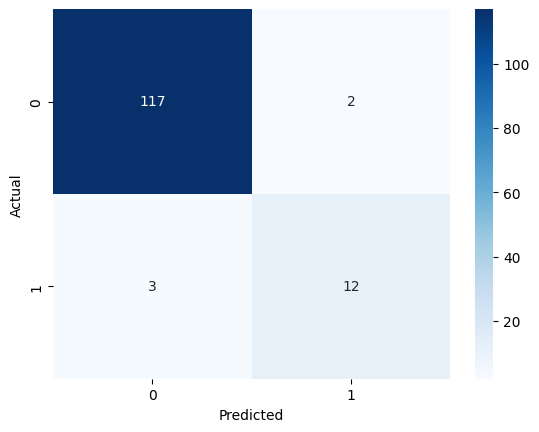

In [75]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### ROC Curve and AUC-ROC

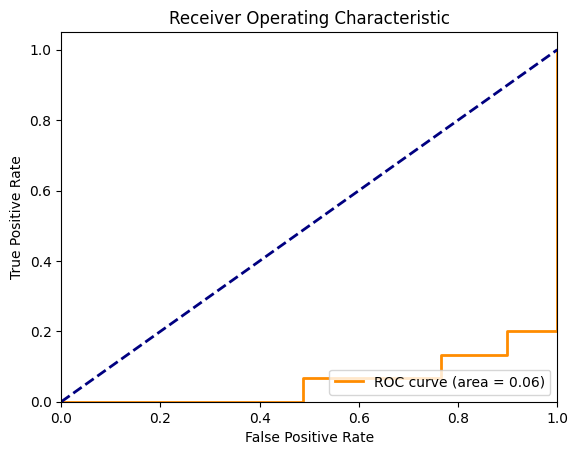

In [77]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

##### Precision-Recall Curve

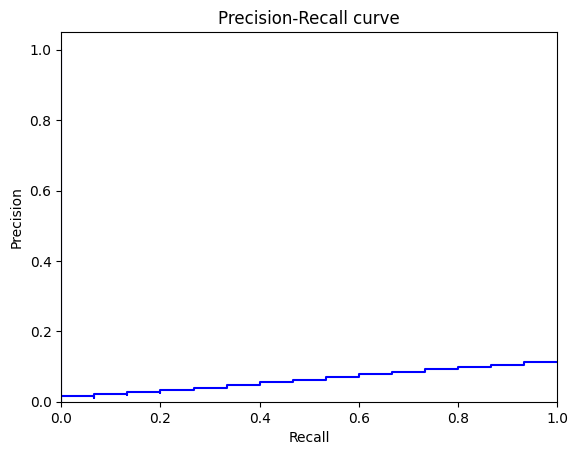

In [80]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

## Conclusion on XGBoost Classifier 

- **Accuracy and Cross-Validation:**

The model demonstrates a high level of accuracy, with an average score of approximatel**y 0.92**66 across five-fold cross-validation. This indicates that the model is capable of making accurate predictions on the given datase
t- **.
Confusion Matrix and Classification Repo**rt:

The confusion matrix and classification report provide a detailed breakdown of the model's performance. It exhibits a strong ability to correctly classify instances, particularly for** the "F**alse" cl
- ass. However, there's some room for improvement in terms of recall for** the "**True" c
l- ass.
Generalization and Stability:

The cross-validation scores indicate that the model's performance is consistent across different subsets of the dataset, suggesting good generalization and stability. This is an important characteristic for a reliable machine learnin
g-  model.
Future Improvements:

While the model's performance is strong, there is an opportunity to further enhance its precision and recall, particular**ly for** the "Tr- - ue" class. This can be achieved through feature engineering, hyperparameter tuning, or exploring more advanced machine learning 
at-  was trained.
Robust Evaluation:

The use of cross-validation ensures that the model's performance is not overfitted to the specific dataset, making the evaluation robust and reliable.

### Save our first model

In [92]:
import joblib

In [93]:
joblib.dump(model, 'first_Xgboost_classifier.pkl')

['first_Xgboost_classifier.pkl']

## Hyperparameter tuning for XGBoost Classifier 

In [85]:
# Define the hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 2, 3]
}

In [90]:
# Perform grid search with cross-validation

In [95]:

grid_search= GridSearchCV(estimator= XGBClassifier(), param_grid=param_grid, scoring= 'f1',n_jobs=-1, cv=5)

In [97]:
#grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_parms =grid_search.best_parms_
best_score =grid_search.best_score_

In [ ]:
# Train the final model with the best hyperparameters

final_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', **best_parms)
final_model.fit(X_train, y_train)

In [ ]:
# Evaluate on the test set

test_